In [352]:
# Standard data science libraries
import pandas as pd
import copy
import numpy as np
from datetime import datetime
from sklearn.impute import SimpleImputer
# Visualization
import seaborn as sns
sns.set()
import matplotlib
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.express as px

import re
import os
%matplotlib inline
import pycountry
from googletrans import Translator
import glob

In [ ]:
import locale
locale.setlocale(locale.LC_ALL, 'en_US')

In [372]:
def preprocessing(dataframe):
    df = dataframe.copy()
    df['date'] = df['date'].replace({'Date of experience: ': ''}, regex=True)
    df['visit'] = df['visit'].replace({'Trip type: ': ''}, regex=True)
    df['date']= [datetime.strptime(date, '%B %Y')for date in df['date']]
    df = df.sort_values(by='date', ascending=False, inplace=False, ignore_index=True)
    df = df.set_index('date')

    return df

In [373]:
def clustering_process(dataframe):
    df = dataframe.copy()
    df[['city', 'country', 'extra']] = df['visitor_origin'].str.split(',', expand=True, n=2)
    #df = pd.get_dummies(df, columns=["visit", "country"])
    df = df.drop(['rating','title','text'], axis=1)
    return df

In [ ]:
def feature_extraction(dataframe):
    df = dataframe.copy()
    df = preprocessing(df)
    df = clustering_process(df)
    visitors_by_country = df.groupby('country').count().sort_values('visit', ascending=True)['visitor_origin']
    type_of_visitors    = df.groupby('visit').count().sort_values('country', ascending=True)['visitor_origin']
    visitors_by_city    = df.groupby('city').count().sort_values('visit', ascending=True)['visitor_origin']
    


In [374]:
file_path = glob.glob('/Users/yacco/Documents/TUM/Applied Machine Learning/group16/Tripadvisor_web_scraper/Preprocessed Datasets/*.csv')

In [375]:
Englischer_Garten = pd.read_csv('English Garden.csv',  header=0, parse_dates=["date"], squeeze=True)
Englischer_Garten_processed = preprocessing(Englischer_Garten)
Englischer_Garten_ready = clustering_process(Englischer_Garten_processed)


In [376]:
Englischer_Garten_ready

,visitor_origin,visit,city,country,extra
date,,,,,
2020-08-01,"Kinross, United Kingdom",NaN,Kinross,United Kingdom,None
2020-08-01,"Frederiksberg, Denmark",NaN,Frederiksberg,Denmark,None
2020-08-01,"Ermenonville, France",Traveled solo,Ermenonville,France,None
2020-08-01,"Eindhoven, The Netherlands",Traveled as a couple,Eindhoven,The Netherlands,None
2020-08-01,"Frederiksberg, Denmark",Traveled as a couple,Frederiksberg,Denmark,None
...,...,...,...,...,...
2018-09-01,NaN,NaN,NaN,NaN,NaN
2018-09-01,"Boston, MA, United States",NaN,Boston,MA,United States
2018-09-01,"Papeete, French Polynesia",NaN,Papeete,French Polynesia,None


In [377]:
visitors_by_country = Englischer_Garten_ready.groupby('country').count().sort_values('visit', ascending=True)
type_of_visitors    = Englischer_Garten_ready.groupby('visit').count().sort_values('country', ascending=True)
visitors_by_city = Englischer_Garten_ready.groupby('city').count().sort_values('visit', ascending=True)

In [384]:
type_of_visitors['visitor_origin']

visit
Traveled on business       5
Traveled solo             34
Traveled with friends     72
Traveled with family      96
Traveled as a couple     143
Name: visitor_origin, dtype: int64

In [392]:
visitors_by_country['visitor_origin']

country
 AM                  1
 GA                  1
 Hungary             1
 Indiana             1
 Kenya               1
                  ... 
 Australia          25
 Spain              37
 United Kingdom     62
 Italy              76
 Germany           129
Name: visitor_origin, Length: 96, dtype: int64

In [396]:
visitors_by_city['visitor_origin']['Munich']

51

Text(0, 0.5, '')

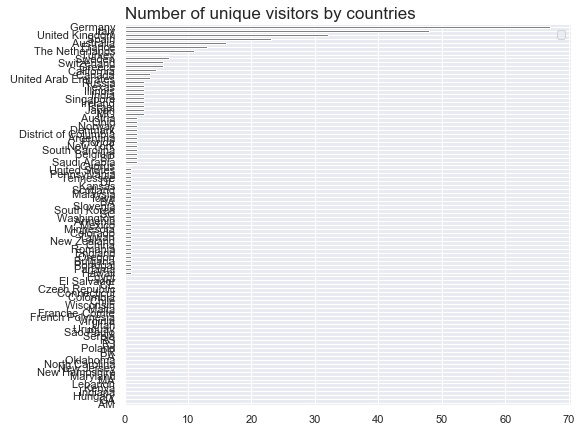

In [379]:
plt.rc("figure", figsize=(8, 7))
visitors_by_country['visit'].plot(kind='barh', color='grey')
sns.despine()
plt.title('Number of unique visitors by countries', loc='left', size=17)
plt.legend("")
plt.ylabel("")

Text(0, 0.5, '')

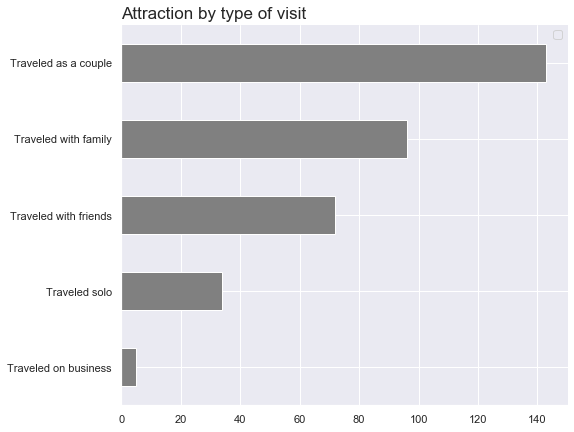

In [382]:
plt.rc("figure", figsize=(8, 7))
type_of_visitors['city'].plot(kind='barh', color='grey')
sns.despine()
plt.title('Attraction by type of visit', loc='left', size=17)
plt.legend("")
plt.ylabel("")

In [179]:
def clustering_preprocessing(dataframe):
    df = dataframe.copy()
    df['date'] = df['date'].replace({'Erlebnisdatum: ': ''}, regex=True)
    df['visit'] = df['visit'].replace({'Reiseart: ': ''}, regex=True)
    df[['city', 'country']] = df['visitor_origin'].str.split(',', expand=True, n=2)
    df = pd.get_dummies(df, columns=["visit", "country"])
    df = df.drop(['rating'], axis=1)
    return df

In [182]:
Englischer_Garten_clustering = clustering_preprocessing(Englischer_Garten)

In [183]:
Englischer_Garten_clustering

,date,title,text,visitor_origin,city,visit_allein,visit_als Paar,visit_geschäftlich,visit_mit Freunden,visit_mit der Familie,country_ Austria,country_ Deutschland,country_ Frankreich,country_ Germany,country_ Italien,country_ Mexiko,country_ Schweiz,country_ Washington,country_ Österreich
0,August 2020,Sehenswert,Der englische Garten erstreckt sich über mehre...,"München, Deutschland",München,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,August 2020,Schöm angelegter Park,Es ist nicht schön Sauber aber das habe ich be...,"Rottweil, Deutschland",Rottweil,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,August 2020,Urlaubsgefühle mitten in München,Der Englische Garten gehört definitiv zu den M...,"Hammersbach, Deutschland",Hammersbach,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,Juli 2020,Eine Oase,Lange Spaziergänge sind hier genauso möglich w...,"Bensheim, Germany",Bensheim,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,Juli 2020,Lustwandeln in München,Sehr schön zum spazieren gehen. Gemütlich und ...,"Dortmund, Deutschland",Dortmund,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,September 2018,Familienurlaub,"Sehr zu empfehlen mit Kindern,fantastischer Bi...",NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0
301,Oktober 2018,Eine grüne Lunge mitten in der Stadt :-),Der Englische Garten ist Münchner Lebensart pu...,"München, Deutschland",München,0,1,0,0,0,0,1,0,0,0,0,0,0,0
302,Mai 2018,Schöner Park inmitten von München,Perfekt für lange Spaziergänge. Erholsames Erl...,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0
303,Juli 2018,Kocherlball,"Traumhafter, größter Park Münchens. Relaxen, e...",NaN,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [184]:
import locale
locale.setlocale(locale.LC_ALL, '')

'German_Germany.1252'

In [190]:
Englischer_Garten['date']= [datetime.strptime(date, '%m %Y')for date in Englischer_Garten['date']]

ValueError: time data 'August 2020' does not match format '%d/%m/%Y'

In [196]:
type_of_visitors['date']

visit
geschäftlich       11
allein             14
mit der Familie    43
mit Freunden       71
als Paar           75
Name: date, dtype: int64

'en_US'

In [211]:
Englischer_Garten.head(50)

,date,title,text,rating,visitor_origin,visit
0,2020-08-01,Sehenswert,Der englische Garten erstreckt sich über mehre...,40,"München, Deutschland",als Paar
1,2020-08-01,Schöm angelegter Park,Es ist nicht schön Sauber aber das habe ich be...,40,"Rottweil, Deutschland",als Paar
2,2020-08-01,Urlaubsgefühle mitten in München,Der Englische Garten gehört definitiv zu den M...,50,"Hammersbach, Deutschland",als Paar
3,2020-07-01,Eine Oase,Lange Spaziergänge sind hier genauso möglich w...,50,"Bensheim, Germany",NaN
4,2020-07-01,Lustwandeln in München,Sehr schön zum spazieren gehen. Gemütlich und ...,50,"Dortmund, Deutschland",NaN
5,2020-08-01,Sehenswert,Der englische Garten erstreckt sich über mehre...,40,"München, Deutschland",als Paar
6,2020-08-01,Schöm angelegter Park,Es ist nicht schön Sauber aber das habe ich be...,40,"Rottweil, Deutschland",als Paar
7,2020-08-01,Grand parc fréquenté,"Très beau et très fréquenté des familles, beau...",30,"Toulouse, Frankreich",NaN
8,2020-08-01,Urlaubsgefühle mitten in München,Der Englische Garten gehört definitiv zu den M...,50,"Hammersbach, Deutschland",als Paar
9,2020-08-01,Skuffende,Når man kommer fra vandring i smukke og rene G...,30,"Frederiksberg, Dänemark",NaN
